# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [77]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [20]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [21]:
y = df['Class']
df.drop('Class', axis=1, inplace=True)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [70]:
model_regression = LogisticRegression()
model_knn = KNeighborsClassifier(n_neighbors=5)

In [71]:
#display(model_regression.coef_[0])
#display(len(X_train.columns))
display(X_train.shape)
model_regression.fit(X_train, y_train)

odds = np.exp(model_regression.coef_[0])
pd.DataFrame(odds, X.columns, columns=['coef']).sort_values(by='coef')

(242085, 30)

,coef
V14,0.269449
V17,0.327995
V3,0.458509
V2,0.469055
V9,0.489946
V16,0.552184
V13,0.611249
V10,0.642367
V15,0.756922
V8,0.766510


** Все коэффициенты кажутся значимыми ** 

In [72]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

### Посмотрим результаты на всех метриках без каких либо модификаций ###

In [91]:
def show_results(y_true, y_pred, model_name=None):
    print(f'Model: {model_name}')
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1: {f1_score(y_true, y_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_true, y_pred)}')
    print('\n')

def plot_ROC(y_true, y_pred_proba):
    y_pred_proba = y_pred_proba[:, 1]
    plt.figure(figsize=(7, 7))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, 'b', linewidth=3)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot([0, 0], [0, 1], 'k')
    plt.plot([1, 1], [0, 1], 'k')
    plt.plot([0, 1], [0, 0], 'k')
    plt.plot([0, 1], [1, 1], 'k')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.axis('equal')
    plt.title('ROC curve')
    plt.show()


Model: Logistic Regression
Accuracy: 0.9990403071017274
Precision: 0.7976190476190477
Recall: 0.7362637362637363
F1: 0.7657142857142858
ROC AUC: 0.8679324827081155




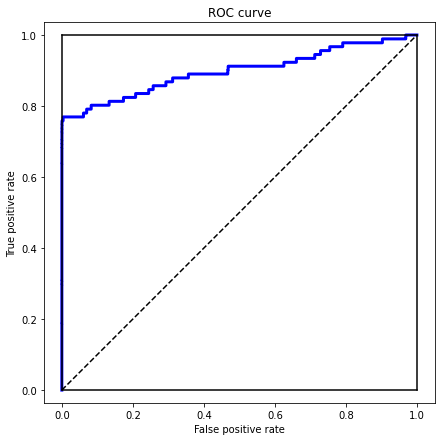

Model: KNN
Accuracy: 0.9979635784841534
Precision: 0.8333333333333334
Recall: 0.054945054945054944
F1: 0.10309278350515463
ROC AUC: 0.5274607989181891


Model: Constant 0
Accuracy: 0.9978699499087121
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5




In [94]:
show_results(y_test, model_regression.predict(X_test), model_name='Logistic Regression')
plot_ROC(y_test, model_regression.predict_proba(X_test))
show_results(y_test, model_knn.predict(X_test), model_name='KNN')
show_results(y_test, np.zeros(len(X_test)), model_name='Constant 0')

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

** Я выберу метрику f1, потому что если мы не забаним какого-то мошенника - это не так страшно, но вот если забаним мирного пользователя - это очень плохо, но при этом если мы забаним слишком мало мошенников - мы бесполезны. Поэтому что-то среднее мне кажется идеальным здесь **

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [120]:
# Переберем веса для 0 и 1 так, чтобы увеличить precision
res_logistic = []
best_f1 = -1
best_weight_1 = -1
all_X_weight = np.linspace(0.01, 3, 10)
for weight_1 in all_X_weight:
    temp_model = LogisticRegression(class_weight={0: 1, 1: weight_1})
    temp_model.fit(X_train, y_train)
    cur_f1 = f1_score(y_test, temp_model.predict(X_test))
    if cur_f1> best_f1:
        best_f1 = cur_f1
        best_weight_1 = weight_1
    res_logistic.append(cur_f1)

Best F1 score for Logistic Regression with custom parameters: 0.7836257309941521
Best weight: 1.338888888888889
All scores for best Logistic Regression model: 
Model: Logistic Regression with custom hyper parameters
Accuracy: 0.9988062356631244
Precision: 0.7040816326530612
Recall: 0.7582417582417582
F1: 0.7301587301587302
ROC AUC: 0.8787807510450658




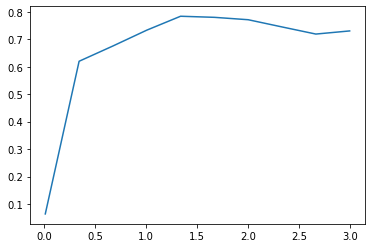

In [121]:
print(f'Best F1 score for Logistic Regression with custom parameters: {best_res}')
print(f'Best weight: {best_weight_1}')
plt.plot(all_X_weight, res_logistic)
print('All scores for best Logistic Regression model: ')
model_regression = LogisticRegression(class_weight={0: 1, 1: best_weight_1})
model_regression.fit(X_train, y_train)
show_results(y_test, temp_model.predict(X_test), 'Logistic Regression with custom hyper parameters')

** Улучшили accuracy, precision, recall, f1, ROC - уже неплохо! **

In [122]:
# Теперь для KNN подберем наилучшее количество ближайших соседей
knn_X = np.arange(1, 12)
res_knn = []
best_f1 = -1
best_k = -1
for k in knn_X:
    temp_model = KNeighborsClassifier(n_neighbors=k)
    temp_model.fit(X_train, y_train)
    cur_f1 = f1_score(y_test, temp_model.predict(X_test))
    if cur_f1 > best_f1:
        best_f1 = cur_f1
        best_k = k
    res_knn.append(cur_f1)
    

Best F1 score for KNN with custom K: 0.22900763358778628
Best weight: 1
All scores for best KNN model: 
Model: KNN with custom K
Accuracy: 0.9979167641964327
Precision: 1.0
Recall: 0.02197802197802198
F1: 0.043010752688172046
ROC AUC: 0.510989010989011




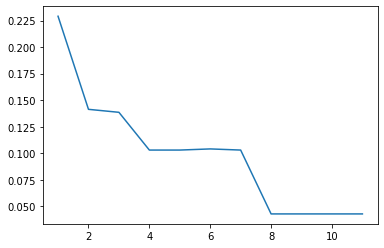

In [123]:
print(f'Best F1 score for KNN with custom K: {best_f1}')
print(f'Best weight: {best_k}')
plt.plot(knn_X, res_knn)
print('All scores for best KNN model: ')
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
show_results(y_test, temp_model.predict(X_test), 'KNN with custom K')

** Ну у KNN все время очень хороший precision, но очень плохой recall, так что давайте попробуем его улучшить ** 

In [124]:
knn_X = np.arange(1, 12)
res_knn = []
best_recall = -1
best_k = -1
for k in knn_X:
    temp_model = KNeighborsClassifier(n_neighbors=k)
    temp_model.fit(X_train, y_train)
    cur_recall = recall_score(y_test, temp_model.predict(X_test))
    if cur_recall > best_recall:
        best_recall = cur_recall
        best_k = k
    res_knn.append(cur_recall)

Best recall score for KNN with custom K: 0.16483516483516483
Best weight: 1
All scores for best KNN model: 
Model: KNN with custom K
Accuracy: 0.997635878470109
Precision: 0.375
Recall: 0.16483516483516483
F1: 0.22900763358778628
ROC AUC: 0.5821243685591226




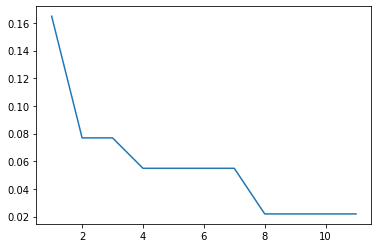

In [126]:
print(f'Best recall score for KNN with custom K: {best_recall}')
print(f'Best weight: {best_k}')
plt.plot(knn_X, res_knn)
print('All scores for best KNN model: ')
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train, y_train)
show_results(y_test, model_knn.predict(X_test), 'KNN with custom K')

** По видимому KNN стоит использовать если нам нужна 100% точность. Добиться большого охвата этой моделью невозможно **

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?